In [9]:
from google.colab import auth
import gspread
from google.auth import default

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential as Seq
from tensorflow.keras.layers import Dense as Den
from tensorflow.keras.metrics import RootMeanSquaredError as rmse

In [10]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

sheet = gc.open('deeplearning').sheet1 
rows = sheet.get_all_values()

df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Input':'int'})
df = df.astype({'Output':'int'})

In [11]:
x = df[["Input"]] .values
y = df[["Output"]].values

In [13]:
scaler = MinMaxScaler()
scaler.fit(x)
x_n = scaler.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_n,y,test_size = 0.3,random_state = 3)

In [14]:
ai = Seq([
    Den(8,activation = 'relu',input_shape=[1]),
    Den(15,activation = 'relu'),
    Den(1),
])

ai.compile(optimizer = 'rmsprop',loss = 'mse')

ai.fit(x_train,y_train,epochs=2000)
ai.fit(x_train,y_train,epochs=2000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 10ms/step - loss: 264.2213
Epoch 1232/2000
1/1 [==============================] - 0s 9ms/step - loss: 263.6869
Epoch 1233/2000
1/1 [==============================] - 0s 10ms/step - loss: 263.1542
Epoch 1234/2000
1/1 [==============================] - 0s 10ms/step - loss: 262.6238
Epoch 1235/2000
1/1 [==============================] - 0s 9ms/step - loss: 262.0957
Epoch 1236/2000
1/1 [==============================] - 0s 8ms/step - loss: 261.5703
Epoch 1237/2000
1/1 [==============================] - 0s 8ms/step - loss: 261.0473
Epoch 1238/2000
1/1 [==============================] - 0s 8ms/step - loss: 260.5273
Epoch 1239/2000
1/1 [==============================] - 0s 8ms/step - loss: 260.0101
Epoch 1240/2000
1/1 [==============================] - 0s 8ms/step - loss: 259.4958
Epoch 1241/2000
1/1 [==============================] - 0s 7ms/step - loss: 258.9847
Epoch 1242/2000
1/1 [=================

<Axes: >

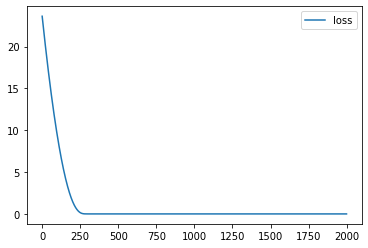

In [15]:
loss_plot = pd.DataFrame(ai.history.history)
loss_plot.plot()

In [16]:
err = rmse()
preds = ai.predict(x_test)
err(y_test,preds)

1/1 [==============================] - 0s 67ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.07026707>

In [17]:
x_n1 = [[30]]
x_n_n = scaler.transform(x_n1)
ai.predict(x_n_n)

1/1 [==============================] - 0s 27ms/step


array([[150.13535]], dtype=float32)